Approach to the problem

1.   Load the data and libraries
2.   Data preparation and transformation
3.   Visualization
4.   Analysis
      1.  Univariate
      2.   Bivariate
      3.   multivariate
              1.   Supervised
                  1.   Classification: Y is discrete(0/1)
                  2.   Regression:Y is continous
              2.   unsupervised














# Load the data and libraries

Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


Load the data

In [2]:
houseprices=pd.read_csv('/content/HousePrices.csv')

Audit the data

In [3]:
houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [4]:
houseprices.head()


,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis (Uni-Variate & Bi-Variate)

Univariate Analysis

In [5]:
houseprices.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<ipython-input-6-14ea48529ae6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprices['Dwell_Type'], kde = True)


<Axes: xlabel='Dwell_Type', ylabel='Density'>

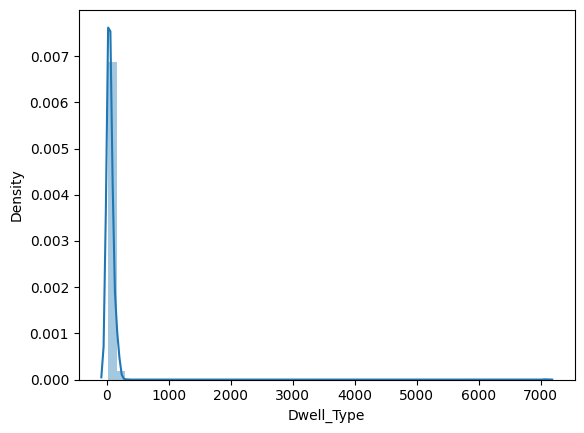

In [6]:
sns.distplot(houseprices['Dwell_Type'], kde = True)

<ipython-input-7-9653b27438c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprices['LotFrontage'], kde = True)


<Axes: xlabel='LotFrontage', ylabel='Density'>

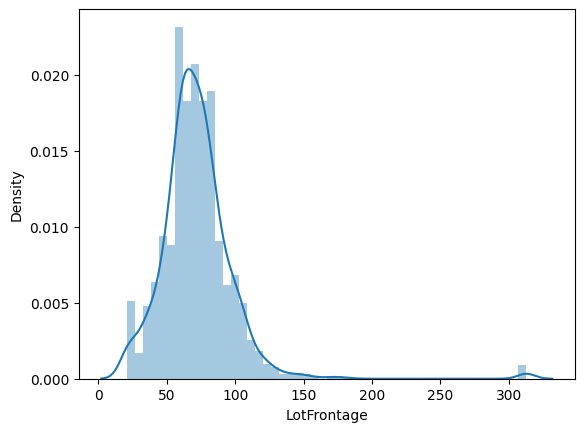

In [7]:
sns.distplot(houseprices['LotFrontage'], kde = True)

In [8]:
houseprices.skew()

<ipython-input-8-f06ebe74a6ce>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  houseprices.skew()


Id                     -0.033712
Dwell_Type             40.872292
LotFrontage             3.448015
LotArea                11.239413
OverallQual             0.196350
OverallCond             0.649335
YearBuilt              -0.516261
YearRemodAdd           -0.579862
MasVnrArea              2.576900
BsmtFinSF1              1.468890
BsmtFinSF2              4.027937
BsmtUnfSF               0.924212
TotalBsmtSF             1.156452
1stFlrSF                1.247346
2ndFlrSF                0.808616
LowQualFinSF            8.652420
GrLivArea               1.169644
BsmtFullBath            0.619665
BsmtHalfBath            4.169617
FullBath               -0.045613
HalfBath                0.674001
BedroomAbvGr            0.123019
KitchenAbvGr            4.312676
TotRmsAbvGrd            0.721687
Fireplaces              0.625415
GarageYrBlt            -0.700172
GarageCars             -0.373705
GarageArea              0.135391
WoodDeckSF              1.763668
OpenPorchSF             2.257522
EnclosedPo

<ipython-input-9-892ea158b118>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprices['YearBuilt'], kde = True)


<Axes: xlabel='YearBuilt', ylabel='Density'>

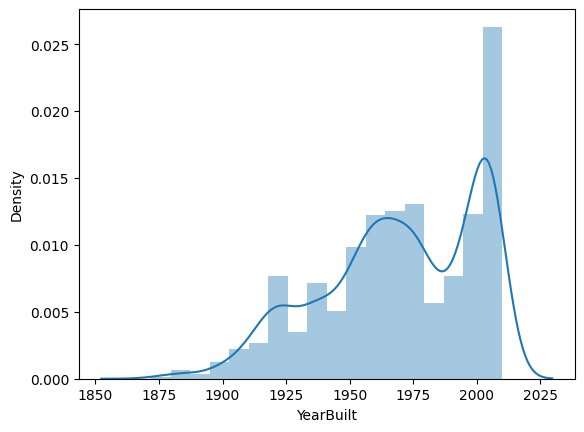

In [9]:
sns.distplot(houseprices['YearBuilt'], kde = True)

<ipython-input-10-b04e8698d880>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprices['BsmtFinSF2'], kde = True)


<Axes: xlabel='BsmtFinSF2', ylabel='Density'>

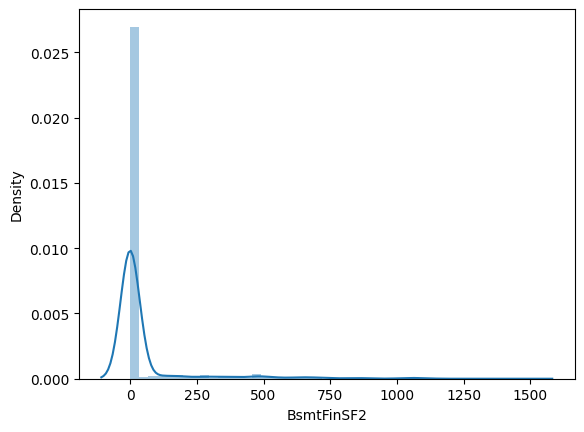

In [10]:
sns.distplot(houseprices['BsmtFinSF2'], kde = True)

<Axes: >

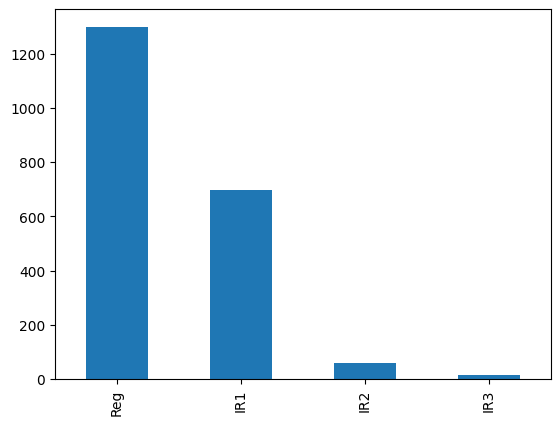

In [11]:
houseprices['Property_Shape'].value_counts().plot(kind='bar')

<Axes: >

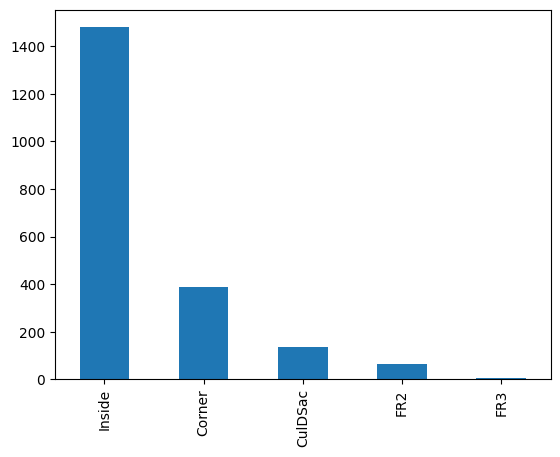

In [12]:
houseprices['LotConfig'].value_counts().plot(kind='bar')

<Axes: >

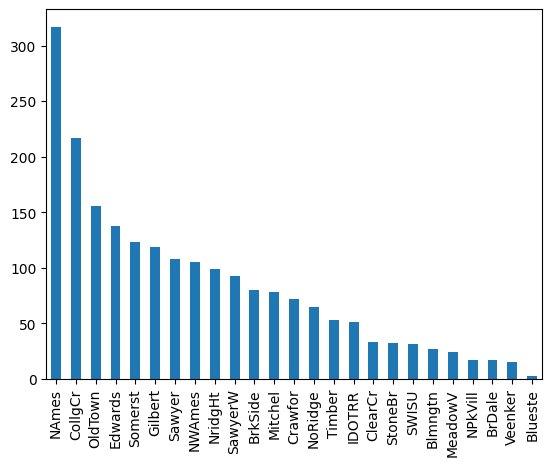

In [13]:
houseprices['Neighborhood'].value_counts().plot(kind='bar')

<Axes: >

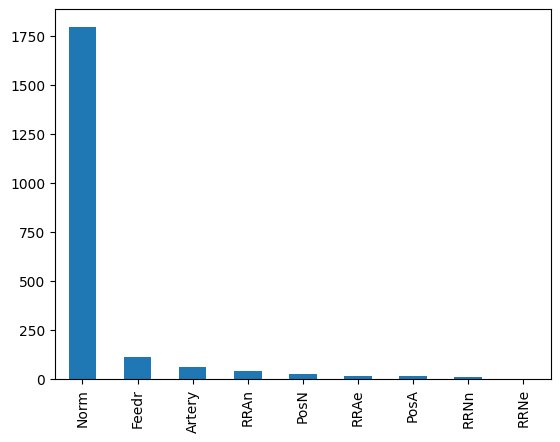

In [14]:
houseprices['Condition1'].value_counts().plot(kind='bar')

<Axes: >

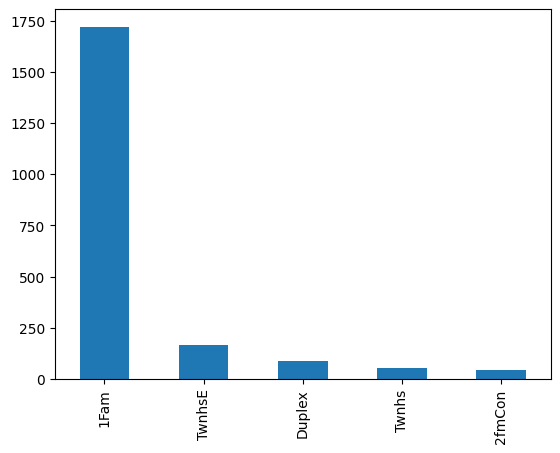

In [15]:
houseprices['Dwelling_Type'].value_counts().plot(kind='bar')

<Axes: >

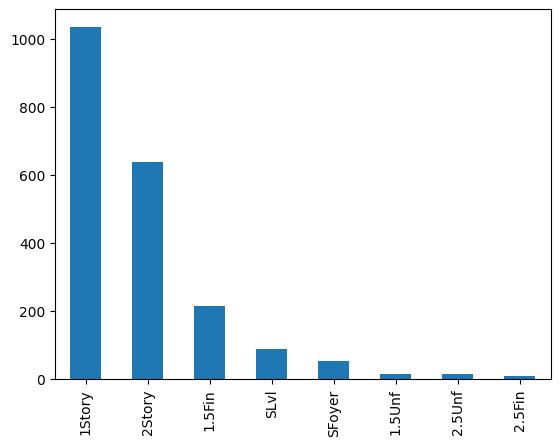

In [16]:
houseprices['HouseStyle'].value_counts().plot(kind='bar')

<Axes: >

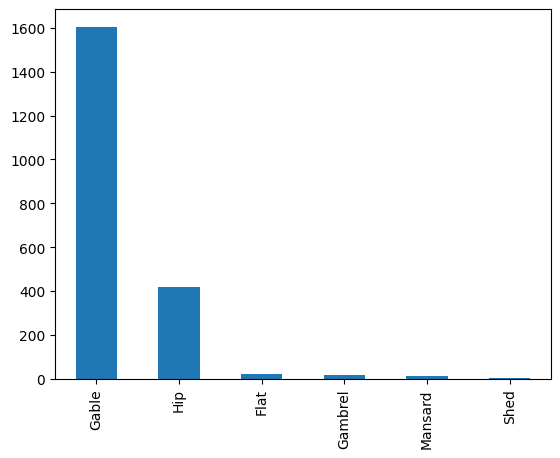

In [17]:
houseprices['RoofStyle'].value_counts().plot(kind='bar')

<ipython-input-18-892ea158b118>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(houseprices['YearBuilt'], kde = True)


<Axes: xlabel='YearBuilt', ylabel='Density'>

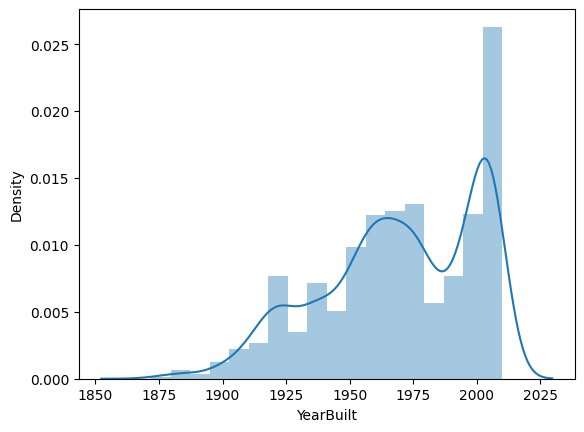

In [18]:
sns.distplot(houseprices['YearBuilt'], kde = True)

# Bivariate Analysis

Correlation

<ipython-input-19-24f6c0ef3826>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(houseprices.corr(), annot = True)


<Axes: >

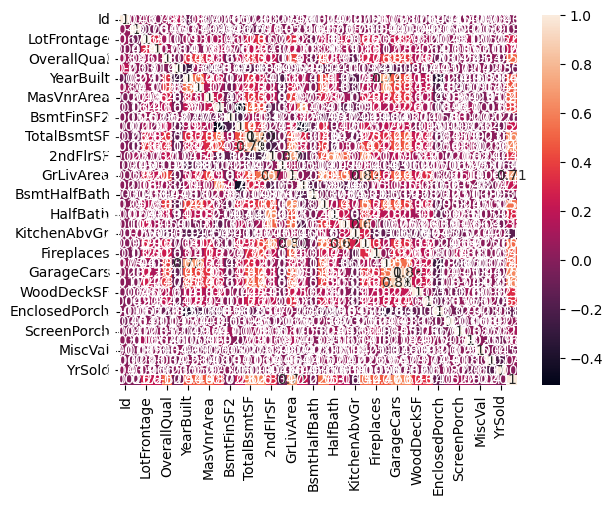

In [19]:
sns.heatmap(houseprices.corr(), annot = True)

Chi square Test

In [20]:
houseprices['Property_Shape'].value_counts()

Reg    1300
IR1     698
IR2      60
IR3      15
Name: Property_Shape, dtype: int64

In [21]:
houseprices['Foundation'].value_counts()

PConc     928
CBlock    901
BrkTil    191
Slab       40
Stone      10
Wood        3
Name: Foundation, dtype: int64

In [22]:
pd.crosstab(houseprices['Property_Shape'], houseprices['Foundation'])

Foundation,BrkTil,CBlock,PConc,Slab,Stone,Wood
Property_Shape,,,,,,
IR1,30,293,365,6,2,2
IR2,3,11,43,2,0,1
IR3,1,3,11,0,0,0
Reg,157,594,509,32,8,0




*   Null Hypothesis: Outlet_Location_Type & Outlet_Size are independent
*   Alternate Hypothesis: Outlet_Location_Type & Outlet are
dependent



In [23]:
from scipy.stats import chi2_contingency

In [24]:
def chi2_sq_test(var1, var2):
  contingency_table = pd.crosstab(var1, var2)
  _,pvalue,_,_ = chi2_contingency(contingency_table)
  if pvalue <0.05:
    print('Accept the Alternative Hypothesis', round(pvalue,2))
  else:
    print('Do Not Accept the Alternative Hypothesis', round(pvalue, 2))
  return contingency_table

In [25]:
chi2_sq_test(houseprices['Property_Shape'], houseprices['Foundation'])

Accept the Alternative Hypothesis 0.0


Foundation,BrkTil,CBlock,PConc,Slab,Stone,Wood
Property_Shape,,,,,,
IR1,30,293,365,6,2,2
IR2,3,11,43,2,0,1
IR3,1,3,11,0,0,0
Reg,157,594,509,32,8,0


In [26]:
chi2_sq_test(houseprices['LotConfig'], houseprices['Neighborhood'])

Accept the Alternative Hypothesis 0.0


Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
LotConfig,,,,,,,,,,,,,,,,,,,,,
Corner,0,0,0,17,4,34,13,23,27,13,...,16,14,45,5,21,16,19,3,15,1
CulDSac,1,0,0,0,6,22,2,8,11,0,...,9,0,0,0,10,7,7,9,6,4
FR2,0,0,0,2,0,10,1,1,7,0,...,4,5,0,0,2,0,9,0,0,3
FR3,0,0,0,1,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
Inside,26,3,17,60,23,151,56,106,74,38,...,36,78,111,26,75,70,87,20,32,7


In [27]:
chi2_sq_test(houseprices['HouseStyle'], houseprices['RoofStyle'])

Accept the Alternative Hypothesis 0.0


RoofStyle,Flat,Gable,Gambrel,Hip,Mansard,Shed
HouseStyle,,,,,,
1.5Fin,0,192,6,15,0,1
1.5Unf,0,16,0,0,0,0
1Story,12,735,0,287,1,1
2.5Fin,0,9,0,1,0,0
2.5Unf,0,12,0,4,0,0
2Story,2,529,8,91,8,0
SFoyer,2,48,0,3,1,0
SLvl,3,65,1,19,1,0


In [28]:
chi2_sq_test(houseprices['Dwelling_Type'], houseprices['Exterior1st'])

Accept the Alternative Hypothesis 0.0


Exterior1st,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
Dwelling_Type,,,,,,,,,,,,,,,
1Fam,21,0,3,62,1,49,276,1,226,102,3,25,648,268,34
2fmCon,1,0,0,0,0,0,5,0,16,2,0,0,9,11,0
Duplex,2,2,0,6,0,0,11,0,21,24,0,3,10,6,2
Twnhs,0,0,0,0,0,13,11,0,14,3,0,0,14,0,0
TwnhsE,0,0,0,4,0,25,13,0,31,25,0,0,69,0,1


In [29]:
chi2_sq_test(houseprices['Foundation'], houseprices['BsmtFinType2'])

Accept the Alternative Hypothesis 0.0


BsmtFinType2,ALQ,BLQ,GLQ,LwQ,Rec,Unf
Foundation,,,,,,
BrkTil,2,1,0,1,3,183
CBlock,16,46,10,60,66,688
PConc,6,3,12,7,10,886
Stone,0,0,0,0,0,10
Wood,0,0,0,0,0,3


In [30]:
chi2_sq_test(houseprices['HeatingQC'], houseprices['GarageType'])

Accept the Alternative Hypothesis 0.0


GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
HeatingQC,,,,,,
Ex,1,733,10,104,1,167
Fa,1,21,2,0,0,32
Gd,2,182,10,13,2,105
Po,0,0,0,0,0,1
TA,4,316,5,7,9,232


# Data Preparation

In [31]:
houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [32]:
import numpy as np

def data_prep(data):
    # Impute Missing Values
    data['LotFrontage'] = np.where(data['LotFrontage'].isna(),
                                    data['LotFrontage'].median(skipna=True), data['LotFrontage'])
    data['MasVnrType'] = np.where(data['MasVnrType'].isna(),
                                   data['MasVnrType'].mode(dropna=True)[0], data['MasVnrType'])
    data['MasVnrArea'] = np.where(data['MasVnrArea'].isna(),
                                   data['MasVnrArea'].mode(dropna=True)[0], data['MasVnrArea'])
    data['BsmtQual'] = np.where(data['BsmtQual'].isna(),
                                 data['BsmtQual'].mode(dropna=True)[0], data['BsmtQual'])
    data['BsmtCond'] = np.where(data['BsmtCond'].isna(),
                                 data['BsmtCond'].mode(dropna=True)[0], data['BsmtCond'])
    data['BsmtExposure'] = np.where(data['BsmtExposure'].isna(),
                                     data['BsmtExposure'].mode(dropna=True)[0], data['BsmtExposure'])
    data['BsmtFinType1'] = np.where(data['BsmtFinType1'].isna(),
                                    data['BsmtFinType1'].mode(dropna=True)[0], data['BsmtFinType1'])
    data['Electrical'] = np.where(data['Electrical'].isna(),
                                    data['Electrical'].mode(dropna=True)[0], data['Electrical'])
    data['FireplaceQu'] = np.where(data['FireplaceQu'].isna(),
                                    data['FireplaceQu'].mode(dropna=True)[0], data['FireplaceQu'])
    data['GarageType'] = np.where(data['GarageType'].isna(),
                                   data['GarageType'].mode(dropna=True)[0], data['GarageType'])
    data['GarageYrBlt'] = np.where(data['GarageYrBlt'].isna(),
                                    data['GarageYrBlt'].median(skipna=True), data['GarageYrBlt'])
    data['GarageFinish'] = np.where(data['GarageFinish'].isna(),
                                     data['GarageFinish'].mode(dropna=True)[0], data['GarageFinish'])
    data['GarageQual'] = np.where(data['GarageQual'].isna(),
                                   data['GarageQual'].mode(dropna=True)[0], data['GarageQual'])
    data['GarageCond'] = np.where(data['GarageCond'].isna(),
                                   data['GarageCond'].mode(dropna=True)[0], data['GarageCond'])
    data['Years'] = 2024 - data['GarageYrBlt']
    data.drop(['Id', 'Alley', 'Exterior1st','Exterior2nd','BsmtFinType1','PoolQC','PoolArea','3SsnPorch','ScreenPorch'], inplace=True, axis=1)
    return data


In [33]:
data_prep(houseprices)

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,Years
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,0,2,2008,WD,Normal,208500,21.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,0,5,2007,WD,Normal,181500,48.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,0,9,2008,WD,Normal,223500,23.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,NaN,NaN,0,2,2006,WD,Abnorml,140000,26.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,0,12,2008,WD,Normal,250000,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,60,RL,70.0,8755,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,GdPrv,NaN,0,6,2009,WD,Normal,214000,25.0
2069,90,RL,63.0,7711,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,0,8,2007,Oth,Abnorml,150000,40.0
2070,90,RL,313.0,25000,Pave,Reg,Low,AllPub,Inside,Gtl,...,0,NaN,NaN,0,6,2007,WD,Normal,143000,7.0
2071,20,RL,52.0,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,...,0,NaN,NaN,0,1,2009,COD,Abnorml,137500,66.0


# Divide the data into X and Y

In [48]:
y = house_enc['Property_Sale_Price']
x =house_enc.drop('Property_Sale_Price', axis = 1)

In [49]:
print(y.shape)
print(x.shape)

(2073,)
(2073, 244)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1658, 244)
(415, 244)
(1658,)
(415,)


# MultiVariate Model

Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()
#train the model
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
print(lr.intercept_)

-813850.8094594431


In [55]:
print(lr.coef_)

[-2.15434549e+00  2.63488174e+01  4.45703431e-01  1.05187113e+03
  1.98247962e+03  5.34363862e+01  7.46526680e+01  3.48001622e+01
  1.92116548e+01  9.22464499e-01  1.78432361e+00  2.19185036e+01
  2.54246444e+01  2.85387049e+01 -2.97079978e+01  2.42554516e+01
  2.01252505e+03  1.20686267e+03  6.57288345e+03  4.37887689e+03
 -3.79415341e+03 -1.61782778e+04  1.57366112e+03  4.90063112e+03
 -1.80338912e+01  2.09194166e+03  1.97474012e+01  1.06154819e+01
  1.66450999e+01  6.29447245e+00  3.14697693e+00 -4.10846106e+02
  2.31379418e+02  1.80338822e+01 -2.15066487e+04  2.95932061e+03
  1.09921875e+04  4.29782958e+03  3.25731097e+03 -1.74290261e+04
  1.74290261e+04 -4.98130815e+03  2.50542184e+03  5.72047133e+03
 -3.24458502e+03 -2.13283194e+03  8.20130767e+03 -9.43287792e+03
  3.36440220e+03  1.93207980e+04 -1.93207980e+04  6.96702481e+02
  9.03823483e+03 -5.77137929e+03 -4.60404395e+03  6.40485933e+02
  1.16099368e+04  1.69851044e+04 -2.85950412e+04  3.75980140e+03
  7.70357517e+03  4.73174

In [56]:
X_train.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=244)

In [57]:
for coef, feature in zip(lr.coef_, X_train.columns):
    print(f"{feature}: {coef:.2f}")

Dwell_Type: -2.15
LotFrontage: 26.35
LotArea: 0.45
OverallQual: 1051.87
OverallCond: 1982.48
YearBuilt: 53.44
YearRemodAdd: 74.65
MasVnrArea: 34.80
BsmtFinSF1: 19.21
BsmtFinSF2: 0.92
BsmtUnfSF: 1.78
TotalBsmtSF: 21.92
1stFlrSF: 25.42
2ndFlrSF: 28.54
LowQualFinSF: -29.71
GrLivArea: 24.26
BsmtFullBath: 2012.53
BsmtHalfBath: 1206.86
FullBath: 6572.88
HalfBath: 4378.88
BedroomAbvGr: -3794.15
KitchenAbvGr: -16178.28
TotRmsAbvGrd: 1573.66
Fireplaces: 4900.63
GarageYrBlt: -18.03
GarageCars: 2091.94
GarageArea: 19.75
WoodDeckSF: 10.62
OpenPorchSF: 16.65
EnclosedPorch: 6.29
MiscVal: 3.15
MoSold: -410.85
YrSold: 231.38
Years: 18.03
Zone_Class_C (all): -21506.65
Zone_Class_FV: 2959.32
Zone_Class_RH: 10992.19
Zone_Class_RL: 4297.83
Zone_Class_RM: 3257.31
Road_Type_Grvl: -17429.03
Road_Type_Pave: 17429.03
Property_Shape_IR1: -4981.31
Property_Shape_IR2: 2505.42
Property_Shape_IR3: 5720.47
Property_Shape_Reg: -3244.59
LandContour_Bnk: -2132.83
LandContour_HLS: 8201.31
LandContour_Low: -9432.88
LandC

In [58]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

In [59]:
y_train

1743    187500
1640    144000
2028    153000
1432     64500
1586    144000
         ...  
1638    136500
1095    176432
1130    135000
1294    115000
860     189950
Name: Property_Sale_Price, Length: 1658, dtype: int64

In [60]:
y_hat_train

array([205955.78751656, 134797.03285447, 158186.53496445, ...,
       166927.00076421, 110318.18384748, 175028.07805085])

In [61]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
print('The RMSE for the model is: ', round(rmse_train,2))

The RMSE for the model is:  21192.59


In [62]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('The RMSE for the model is: ', round(rmse_test, 2))

The RMSE for the model is:  27554.85


In [63]:
r2_score_train = (r2_score(y_train, y_hat_train))
print('The R-squared for the model is: ', round(r2_score_train,2))

The R-squared for the model is:  0.93


In [64]:
r2_score_test = (r2_score(y_test, y_hat_test))
print('The R-squared for the model is: ', round(r2_score_test,2))

The R-squared for the model is:  0.87


# onehot Encoding

In [65]:
house_enc=pd.get_dummies(houseprices)

In [66]:
house_enc.head()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [67]:
house_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Columns: 245 entries, Dwell_Type to SaleCondition_Partial
dtypes: float64(4), int64(31), uint8(210)
memory usage: 992.1 KB


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="squared_error")
#fit the model
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [75]:
y_hat_train_dtree=dtree.predict(X_train)
y_hat_test_dtree=dtree.predict(X_test)

In [76]:
print("r2 score of the model for train data is:",round(r2_score(y_train,y_hat_train_dtree),2))

r2 score of the model for train data is: 1.0


In [77]:
print("r2 score of the model for test data is:",round(r2_score(y_test,y_hat_test_dtree),2))

r2 score of the model for test data is: 0.81


In [78]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train_dtree))
print(round(rmse_train,2))

0.0


In [79]:
rmse_test_model = np.sqrt(mean_squared_error(y_test,y_hat_test_dtree))
print(round(rmse_test_model,2))

32996.48


Text(0.5, 1.0, 'tree for the prediction columns')

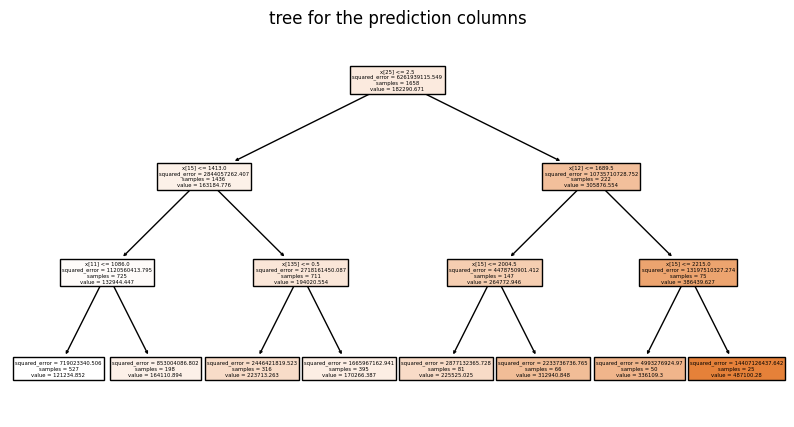

In [80]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
clf = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
plot_tree(clf,filled=True)
plt.title("tree for the prediction columns")

In [72]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
GarageCars,0.377666
GrLivArea,0.225063
1stFlrSF,0.076785
ExterQual_TA,0.049528
TotalBsmtSF,0.036849
...,...
BsmtQual_Fa,0.000000
Zone_Class_C (all),0.000000
Foundation_Wood,0.000000
Foundation_Stone,0.000000


# Feature Selection

In [73]:
#dropping some features
house_enc.drop(['GarageCond_Po',
'GarageCond_Gd',
'GarageCond_Fa',
'GarageCond_Ex',
'LandSlope_Sev',
'GarageQual_Po',
'Neighborhood_Blmngtn',
'Neighborhood_Blueste	',
'GarageQual_Fa',
'GarageQual_Ex',
'GarageCond_TA',
'Neighborhood_BrkSide',
'Neighborhood_ClearCr',
'GarageType_CarPort',
'Neighborhood_NPkVill',
'Neighborhood_NoRidge',
'Neighborhood_Somerst	',
'Foundation_BrkTil',
'Utilities_AllPub',
'LotConfig_FR3',
'Utilities_NoSeWa',
'KitchenAbvGr	',
'SaleCondition_Alloca',
'SaleCondition_AdjLand',
'Zone_Class_C (all)	',
'SaleType_Oth	',
'Road_Type_Grvl	',
'Road_Type_Pave	',
'SaleType_ConLI	',
'SaleType_ConLD	',
'SaleType_Con	',
'SaleType_CWD	',
'SaleType_COD	',
'MiscFeature_TenC',
'Property_Shape_IR2',
'MiscFeature_Othr	',
'MiscFeature_Gar2',
'Fence_MnWw',
'Fence_GdWo	',
'Neighborhood_Veenker',
'Neighborhood_Timber',
'Functional_Sev	',
'FireplaceQu_Ex	',
'HouseStyle_2.5Unf',
'HouseStyle_SFoyer',
'Heating_Floor',
'RoofStyle_Flat',
'RoofStyle_Gambrel',
'RoofStyle_Mansard',
'RoofStyle_Shed	',
'BsmtFinType2_ALQ	',
'RoofMatl_ClyTile	',
'RoofMatl_CompShg',
'RoofMatl_Metal	',
'RoofMatl_Roll	',
'RoofMatl_Tar&Grv',
'BsmtCond_Po	',
'RoofMatl_WdShake',
'RoofMatl_WdShngl	',
'ExterQual_Ex	',
'ExterQual_Fa	',
'ExterCond_Ex	',
'Foundation_Wood',
'Foundation_Stone	',
'Foundation_Slab',
'Heating_GasW	',
'Heating_OthW	',
'Condition1_PosA',
'HouseStyle_2.5Fin',
'ExterCond_Po	',
'Functional_Mod	',
'Condition1_PosN	',
'Functional_Min1',
'Functional_Maj2',
'Functional_Maj1',
'Condition1_RRAe',
'Condition1_RRNe',
'Condition1_RRNn',
'Condition2_Artery',
'Condition2_Feedr	',
'Electrical_Mix	',
'Electrical_FuseP	',
'Condition2_PosA	',
'Condition2_RRAe',
'Condition2_RRAn',
'Condition2_RRNn	',
'HeatingQC_Po	',
'Dwelling_Type_2fmCon',
'HeatingQC_Fa',
'HouseStyle_1.5Unf',
'RoofMatl_Membran'],inplace= True, axis=1,errors='ignore')

In [74]:
house_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Columns: 192 entries, Dwell_Type to SaleCondition_Partial
dtypes: float64(4), int64(31), uint8(157)
memory usage: 884.8 KB
